## Landing AI - Vision Agent
**By: Braulio Otavalo**

In [43]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get the VA_API_KEY
va_api_key = os.getenv('VA_API_KEY')

## Object counting agent

Using Landing AI API to count objects in an image with prompts.

In [44]:
promt = 'Act as [detector in an aerial system] count deers from an [aerial image], be pricise and accurate, consider small object detection and occlusion'

In [49]:
import requests

url = "https://api.landing.ai/v1/tools/text-to-object-detection"
files = {
  "image": open("/workspaces/va-landingai-api/data/deers test.jpg", "rb")
}
data = {
  "prompts": [ promt ],
  "model": "countgd"
}

In [50]:
response = requests.post(url, files=files, data=data)

In [51]:
import json

# Pretty print the JSON response
print(json.dumps(response.json(), indent=4))

{
    "data": [
        [
            {
                "label": "Act as [detector in an aerial system] count deers from an [aerial image], be pricise and accurate, consider small object detection and occlusion",
                "score": 0.8261855244636536,
                "bounding_box": [
                    348.03369140625,
                    110.1669692993164,
                    408.987548828125,
                    161.7200927734375
                ]
            },
            {
                "label": "Act as [detector in an aerial system] count deers from an [aerial image], be pricise and accurate, consider small object detection and occlusion",
                "score": 0.8420705795288086,
                "bounding_box": [
                    503.6689758300781,
                    182.38778686523438,
                    566.4349975585938,
                    231.55361938476562
                ]
            },
            {
                "label": "Act as [detector in an aeri

Total objects detected: 115


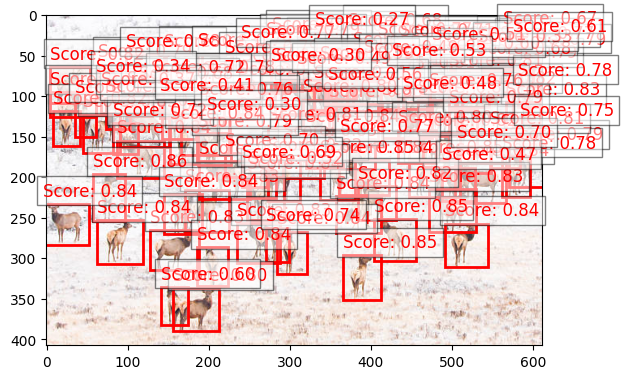

In [52]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
image_path = '/workspaces/va-landingai-api/data/deers test.jpg'
image = Image.open(image_path)

# Extract the data
detections = response.json()['data'][0]

# Create a plot
fig, ax = plt.subplots(1)
ax.imshow(image)

# Plot bounding boxes and scores
for detection in detections:
    if detection['label'] == promt:
        score = detection['score']
        bbox = detection['bounding_box']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(bbox[0], bbox[1] - 10, f'Score: {score:.2f}', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Print the total number of objects detected
total_objects = len(detections)
print(f'Total objects detected: {total_objects}')

plt.show()